# Predicting Survival in the Titanic Data Set

> Using only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,classification_report, f1_score
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

In [3]:
df =pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#dropping unwanted features
df.drop(columns = ['PassengerId','Name','Ticket','Cabin','Embarked'],axis =1,inplace = True )
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [8]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

### We have 177 null values in the age column so we will treat by fill it with the median age

In [10]:
median =df.Age.median()

In [11]:
#filling the missing age values with the median
df['Age'].fillna(median,inplace = True)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
df.groupby('Survived').count()

,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,,,,,,
0,549,549,549,549,549,549
1,342,342,342,342,342,342


In [14]:
#we need to tranform the sec clolumn to numbers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Sex2"] = label_encoder.fit_transform(df["Sex"]) 
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex2
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1


In [15]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
df["Sex2"].value_counts()

1    577
0    314
Name: Sex2, dtype: int64

In [17]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
#droppiing the  the Age column
df.drop(columns=['Sex'],inplace = True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


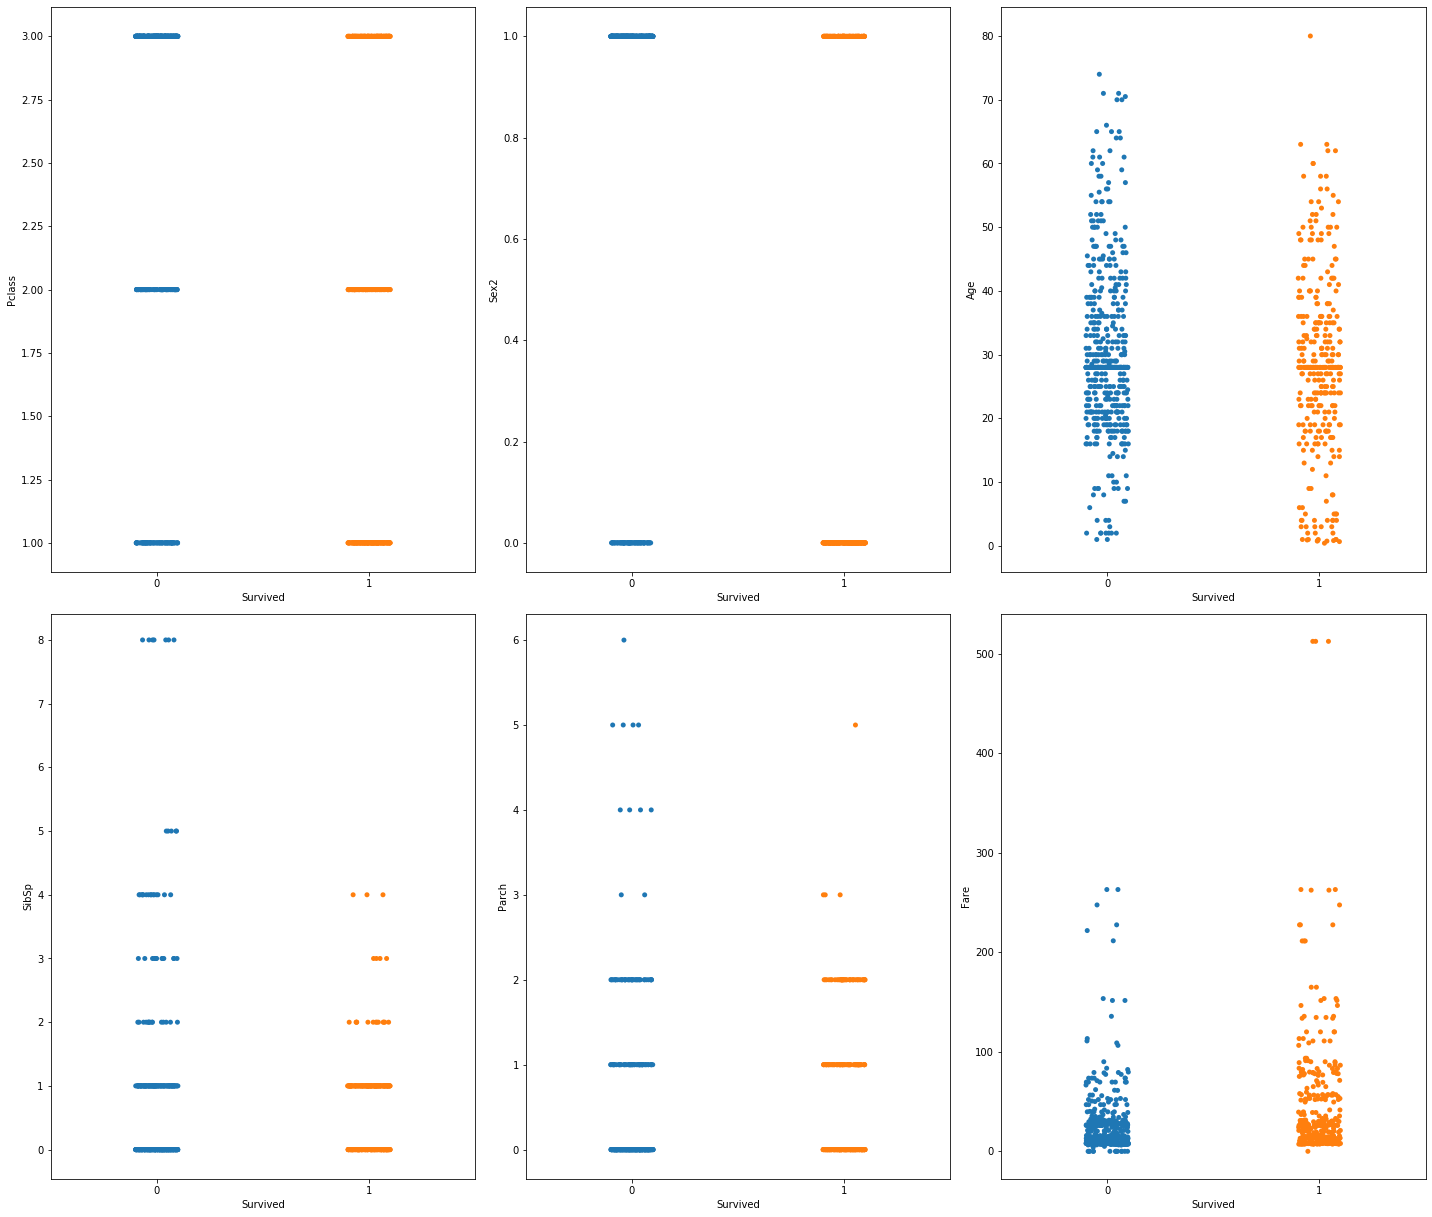

In [19]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
col=['Pclass','Sex2','Age','SibSp','Parch','Fare']
for column in col:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(x=df['Survived'],y=df[column])
    plotnumber+=1
plt.tight_layout()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Sex2      891 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


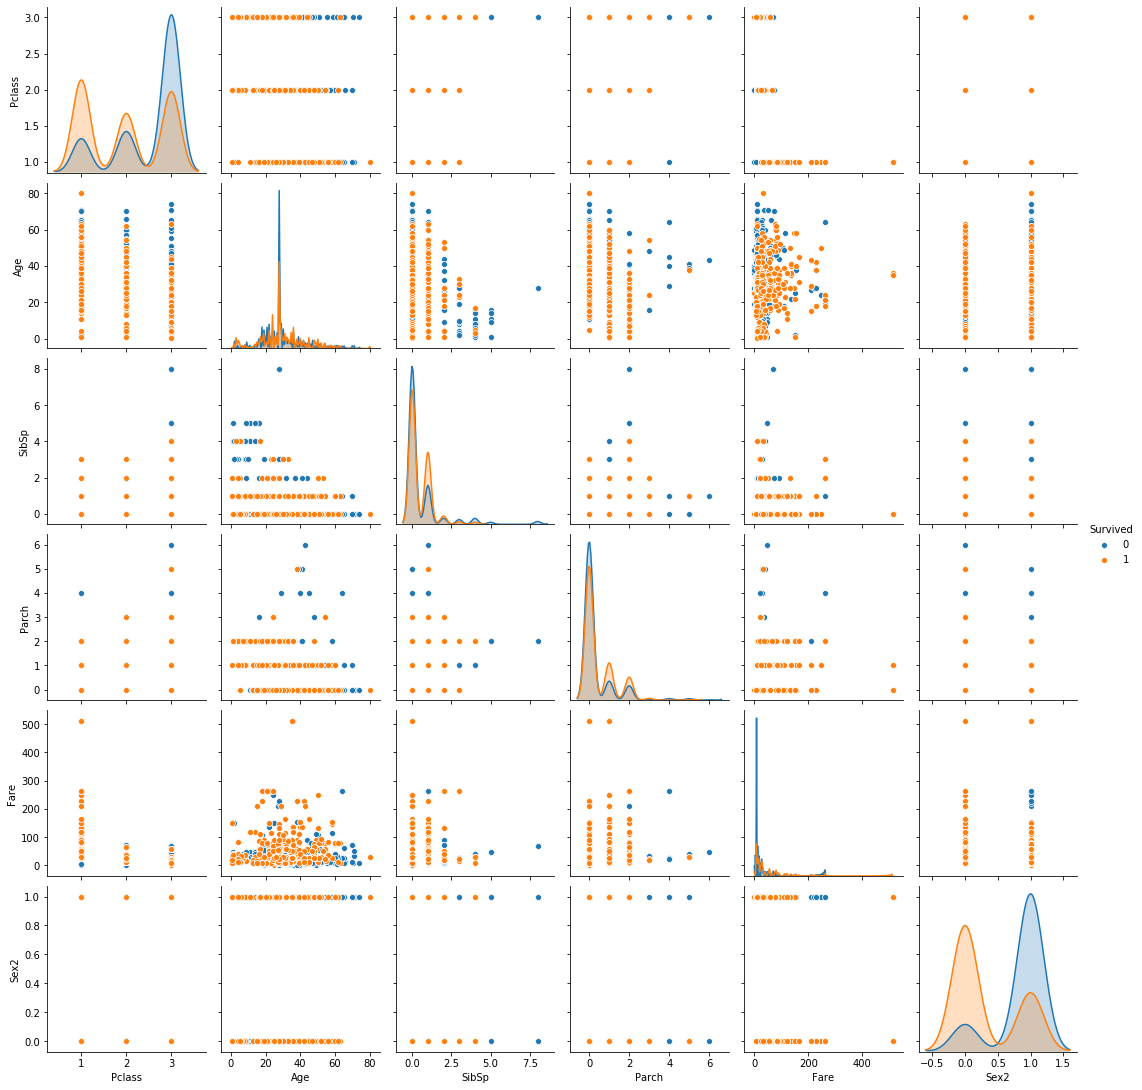

In [26]:
sns.pairplot(df,hue = 'Survived',diag_kws={'bw': 0.2})

In [27]:
X = df.drop(columns = 'Survived')
y = df['Survived']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [29]:
clf = DecisionTreeClassifier(max_depth=4 , random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8355704697986577
Accuracy of test: 0.8305084745762712


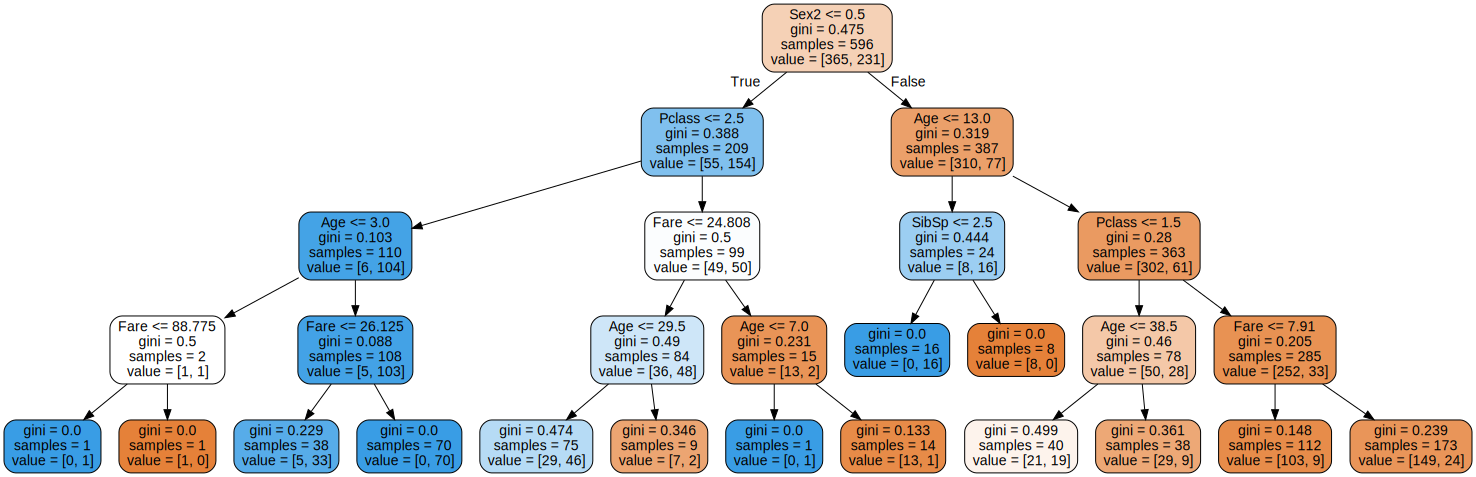

In [30]:
os.environ["PATH"] += ';' + r'C:\Program Files\Graphviz\bin'
#office path
#home path:"C:\Program Files\Graphviz\bin"
#import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

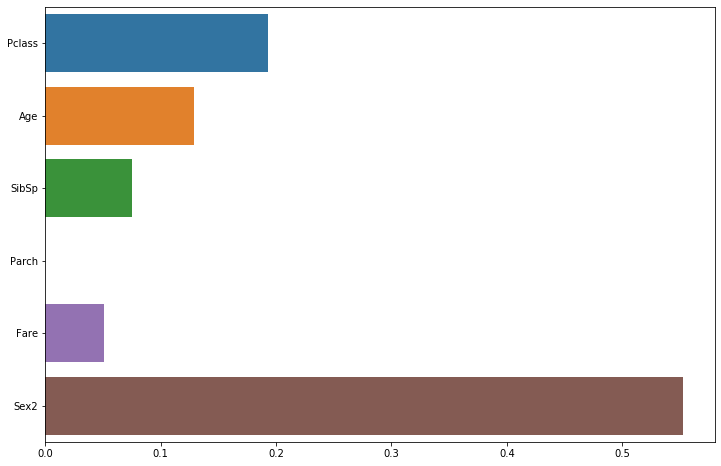

In [31]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

### the sex2 column is the most important feature in this model

In [32]:
importance

array([0.19317325, 0.12862141, 0.0750492 , 0.        , 0.05066901,
       0.55248712])

In [33]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       184
           1       0.82      0.70      0.76       111

    accuracy                           0.83       295
   macro avg       0.83      0.81      0.81       295
weighted avg       0.83      0.83      0.83       295



In [34]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.8280263157894736
Recall = 0.8051556991774383
Accuracy = 0.8305084745762712
F1 Score = 0.8135366100323624


In [35]:
cat = ['Did not Survived','Survived',]
cat

['Did not Survived', 'Survived']

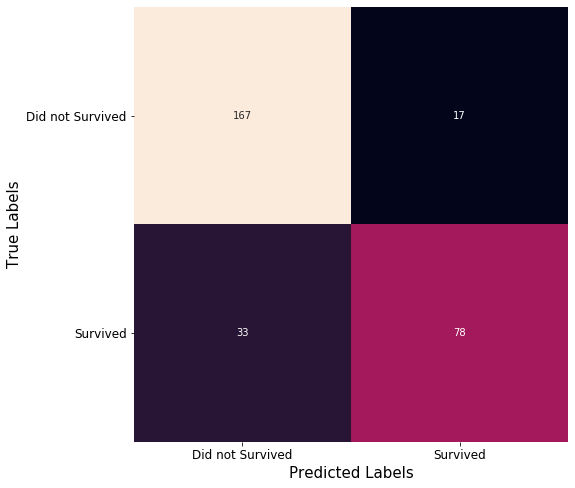

In [36]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False,fmt = '')
ax.xaxis.set_ticklabels(cat,fontsize = 12)
ax.yaxis.set_ticklabels(cat,fontsize = 12,rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

33 people where wrongly classified

In [38]:
#testing my prediction
val = clf.predict(np.array([[2,28,1,1,50,1]]))
val

array([0], dtype=int64)

## Hyperparameter tuning

In [45]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(2,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
    }

In [46]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [47]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)})

In [48]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 7}


In [ ]:
{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4}

In [49]:
grid_search.best_score_

0.8154341736694679

In [54]:
clf2 = DecisionTreeClassifier(criterion = 'gini', max_depth =4,max_features= 'auto', min_samples_leaf= 4, min_samples_split= 4)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=4,
                       min_samples_split=4)

In [55]:
clf2.score(X_test,y_test)

0.8338983050847457

In [56]:
import pickle
file = 'decision_tree.sav'
with open(file, 'wb') as f:
    pickle.dump(clf,f)